In [1]:

import pandas as pd
import numpy as np

 
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
 

In [2]:

print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:


def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns
 
kesson_table(train)


,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [5]:

train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")
 
 
kesson_table(train)
 

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [6]:

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Embarked"] = test["Embarked"].fillna("S")
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
 
kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,327,78.229665


In [7]:
train = train.assign(S = (train["Embarked"] == 'S') + 0,C = (train["Embarked"] == 'C') + 0,Q = (train["Embarked"]== 'Q') + 0)
train = train.assign(SexNum = (train["Sex"] == 'male') + 0)

print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  S  C  Q  SexNum  
0      0         A/5 21171   7.2500   NaN        S  1  0  0       1  
1      0          PC 17599  71.2833   C85        C  0  1  0       0  
2      0  STON/O2. 3101282   7.9250   NaN        S  1  0  0       0  
3      0            113803  53.1000  C12

In [8]:

test = test.assign(S = (test["Embarked"] == 'S') + 0,C = (test["Embarked"] == 'C') + 0,Q = (test["Embarked"]== 'Q') + 0)
test = test.assign(SexNum = (test["Sex"] == 'male') + 0)

test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q,SexNum
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,1,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,0,0,1


In [125]:
import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split

x = train.drop(["Name","PassengerId","Survived","Ticket","Cabin","Embarked","Sex","Fare"],axis=1)

x.head(10)



,Pclass,Age,SibSp,Parch,S,C,Q,SexNum
0,3,22.0,1,0,1,0,0,1
1,1,38.0,1,0,0,1,0,0
2,3,26.0,0,0,1,0,0,0
3,1,35.0,1,0,1,0,0,0
4,3,35.0,0,0,1,0,0,1
5,3,28.0,0,0,0,0,1,1
6,1,54.0,0,0,1,0,0,1
7,3,2.0,3,1,1,0,0,1
8,3,27.0,0,2,1,0,0,0
9,2,14.0,1,0,0,1,0,0


In [126]:
y = train[['Survived']]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [127]:

lgb_params = {"objective":"binary", 
              "metric":"binary_logloss", 
              "max_depth": 2,
              "learning_rate": 0.01,
              "num_iterations" : 700,
              "verbosity": -1}

# データセットを生成する
lgb_train = lgb.Dataset(x, y)
# 上記のパラメータでモデルを学習〜交差検証までする
cv_results = lgb.cv(lgb_params, lgb_train, nfold=5)

/home/tubotu/.local/lib/python3.6/site-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


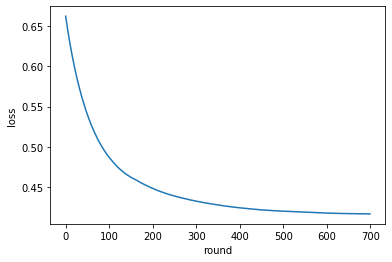

[0.4166820379866786]


In [128]:
from matplotlib import pyplot as plt
cv_loss = cv_results['binary_logloss-mean']
round_n = np.arange(len(cv_loss))

plt.xlabel('round')
plt.ylabel('loss')
plt.plot(round_n, cv_loss)
plt.show()
print(cv_loss[-1:])

In [130]:
X_test = test.drop(["Name","PassengerId","Ticket","Cabin","Embarked","Sex"],axis=1)

# train
gbm = lgb.train(lgb_params,
            lgb_train)
y_pred = gbm.predict(X_test, num_iteration=700)

y_pred = np.where(y_pred > 0.5, 1, 0)




In [131]:

# 予測データのサイズを確認
y_pred.shape

(418,)

In [132]:

# PassengerIdを取得
PassengerId = np.array(test["PassengerId"]).astype(int)
 
# 予測データとPassengerIdをデータフレームへ落とし込む
my_answer = pd.DataFrame(y_pred, PassengerId, columns = ["Survived"])
 
# my_tree_one.csvとして書き出し
my_answer.to_csv("answer.csv", index_label = ["PassengerId"])